In [45]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

## modi Review Dataset

In [46]:
modi_df =pd.read_csv('./modi_reviews.csv')

In [47]:
modi_df.shape

(25688, 3)

In [48]:
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25683 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB


In [49]:
modi_df.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


## Rahul Dataset

In [50]:
rahul_df = pd.read_csv('./rahul_reviews.csv')

In [51]:
rahul_df.shape

(14261, 3)

In [52]:
rahul_df.info

<bound method DataFrame.info of        Unnamed: 0             User  \
0               0     Sunnysweet16   
1               1    drnitinchaube   
2               2        mrvivek07   
3               3    JosephPravinP   
4               4  VandanaMegastar   
...           ...              ...   
14256       14256         SunjayJK   
14257       14257         SunjayJK   
14258       14258       RAMANKAIRA   
14259       14259       RAMANKAIRA   
14260       14260       RAMANKAIRA   

                                                   Tweet  
0      Wonder why no academic or journalist asks INC ...  
1      Congrats for the change #australiavotes2019 an...  
2      Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...  
3      @ajaymaken @RahulGandhi And as a final touch, ...  
4      #LokSabhaElections2019 Anyone not having mass ...  
...                                                  ...  
14256  @quizzicalguy In this #LokSabhaElections2019, ...  
14257  @AnumaVidisha @RahulGandhi @Arvi

In [53]:
rahul_df.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


### change the data type of tweet from object to str

In [54]:
modi_df['Tweet'] = modi_df['Tweet'].astype(str)
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25688 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB


In [55]:
rahul_df['Tweet'] = rahul_df['Tweet'].astype(str)
rahul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14261 non-null  int64 
 1   User        14261 non-null  object
 2   Tweet       14261 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


### Lower Case the Tweet

In [56]:
modi_df['Tweet'] = modi_df['Tweet'].str.lower()
modi_df.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap i am seeing you as future #bj...
1,1,jiaeur,#loksabhaelections2019 \n23rd may 2019 will re...
2,2,PVenkatGandhi,#loksabhaelections2019 \n23rd may 2019 will re...
3,3,TheNirbhay1,pm modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder appointment of successor! \n\...


In [57]:
rahul_df['Tweet'] = rahul_df['Tweet'].str.lower()
rahul_df.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,wonder why no academic or journalist asks inc ...
1,1,drnitinchaube,congrats for the change #australiavotes2019 an...
2,2,mrvivek07,peopel say “govt ne 70 years kya kiya”.\nunse ...
3,3,JosephPravinP,"@ajaymaken @rahulgandhi and as a final touch, ..."
4,4,VandanaMegastar,#loksabhaelections2019 anyone not having mass ...


### Remove Punctutaion from Tweet

In [58]:
import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [59]:
#  cleaned the string woth punctions (Three Parameter)
# str1 = specifies the list of charcater that needed to be reaplaced
# str2 = specifies the list of charcater with which  the character needed to be reaplaced
# str1 = specifies the list of charcater that needed to be deleted

modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
modi_df.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,anjanaomkashyap i am seeing you as future bjp ...
1,1,jiaeur,loksabhaelections2019 \n23rd may 2019 will rev...
2,2,PVenkatGandhi,loksabhaelections2019 \n23rd may 2019 will rev...
3,3,TheNirbhay1,pm modi creates a new record of being the only...
4,4,ShakeChilli,abhijitmajumder appointment of successor \n\ng...


In [60]:
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
rahul_df.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,wonder why no academic or journalist asks inc ...
1,1,drnitinchaube,congrats for the change australiavotes2019 and...
2,2,mrvivek07,peopel say “govt ne 70 years kya kiya”\nunse p...
3,3,JosephPravinP,ajaymaken rahulgandhi and as a final touch mod...
4,4,VandanaMegastar,loksabhaelections2019 anyone not having mass b...


### tokenising Tweet

In [61]:
def textToToken(text):
    return nltk.word_tokenize(text);


modi_df['Tweet_Tokens'] = modi_df['Tweet'].apply(textToToken)
modi_df.head()

,Unnamed: 0,User,Tweet,Tweet_Tokens
0,0,advosushildixit,anjanaomkashyap i am seeing you as future bjp ...,"[anjanaomkashyap, i, am, seeing, you, as, futu..."
1,1,jiaeur,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, will,..."
2,2,PVenkatGandhi,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, will,..."
3,3,TheNirbhay1,pm modi creates a new record of being the only...,"[pm, modi, creates, a, new, record, of, being,..."
4,4,ShakeChilli,abhijitmajumder appointment of successor \n\ng...,"[abhijitmajumder, appointment, of, successor, ..."


In [62]:
rahul_df['Tweet_Tokens'] = rahul_df['Tweet'].apply(textToToken)
rahul_df.head()

,Unnamed: 0,User,Tweet,Tweet_Tokens
0,0,Sunnysweet16,wonder why no academic or journalist asks inc ...,"[wonder, why, no, academic, or, journalist, as..."
1,1,drnitinchaube,congrats for the change australiavotes2019 and...,"[congrats, for, the, change, australiavotes201..."
2,2,mrvivek07,peopel say “govt ne 70 years kya kiya”\nunse p...,"[peopel, say, “, govt, ne, 70, years, kya, kiy..."
3,3,JosephPravinP,ajaymaken rahulgandhi and as a final touch mod...,"[ajaymaken, rahulgandhi, and, as, a, final, to..."
4,4,VandanaMegastar,loksabhaelections2019 anyone not having mass b...,"[loksabhaelections2019, anyone, not, having, m..."


In [63]:
def stopToWords(tokenized_words):
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)
    return final_words


modi_df['Tweet_Tokens'] = modi_df['Tweet_Tokens'].apply(stopToWords)
modi_df.head()

,Unnamed: 0,User,Tweet,Tweet_Tokens
0,0,advosushildixit,anjanaomkashyap i am seeing you as future bjp ...,"[anjanaomkashyap, seeing, future, bjp, spokesp..."
1,1,jiaeur,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, revea..."
2,2,PVenkatGandhi,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, revea..."
3,3,TheNirbhay1,pm modi creates a new record of being the only...,"[pm, modi, creates, new, record, pm, democrati..."
4,4,ShakeChilli,abhijitmajumder appointment of successor \n\ng...,"[abhijitmajumder, appointment, successor, god,..."


In [67]:
def emotionAndWords(text):
    word_list =[]
    emotion_list = []
    with open('./emotion','r') as file:
        for line in file:
            clear_line = line.replace(',','')\
            .replace('\n','')\
            .replace("'",'')\
            .strip()
            word,emotion = clear_line.split(':')
#             print("Words : "+word+" Emotion:"+emotion)
        
            if word in text:
                word_list.append(word)
                emotion_list.append(emotion)
    return emotion_list

modi_df["EmotionWords"] = modi_df["Tweet_Tokens"].apply(emotionAndWords)
modi_df.head()

,Unnamed: 0,User,Tweet,Tweet_Tokens,EmotionWords
0,0,advosushildixit,anjanaomkashyap i am seeing you as future bjp ...,"[anjanaomkashyap, seeing, future, bjp, spokesp...",[]
1,1,jiaeur,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, revea...",[]
2,2,PVenkatGandhi,loksabhaelections2019 \n23rd may 2019 will rev...,"[loksabhaelections2019, 23rd, may, 2019, revea...",[]
3,3,TheNirbhay1,pm modi creates a new record of being the only...,"[pm, modi, creates, new, record, pm, democrati...",[]
4,4,ShakeChilli,abhijitmajumder appointment of successor \n\ng...,"[abhijitmajumder, appointment, successor, god,...","[ sad, sad]"


In [70]:
emotion_list_modi = []
for i in range(len(modi_df['EmotionWords'])):
    emotion_list_modi = emotion_list_modi + modi_df['EmotionWords'][i]

print(emotion_list_modi)

[' sad', ' sad', ' demoralized', ' lost', ' entitled', ' happy', ' apathetic', ' sad', ' happy', ' independent', ' happy', ' free', ' adequate', ' independent', ' powerless', ' happy', ' attracted', ' fearful', ' attached', ' sad', ' powerless', ' lost', ' lost', ' happy', ' alone', ' happy', ' sad', ' loved', ' happy', ' lost', ' entitled', ' surprise', ' alone', ' alone', ' alone', ' happy', ' focused', ' independent', ' cheated', ' happy', ' alone', ' happy', ' happy', ' happy', ' average', ' angry', ' fearful', ' fearless', ' adequate', ' fearful', ' powerless', ' attached', ' loved', ' happy', ' adequate', ' happy', ' surprise', ' fearful', ' happy', ' happy', ' powerless', ' attached', ' happy', ' fearful', ' happy', ' adequate', ' sad', ' sad', ' independent', ' fearful', ' fearful', ' powerless', ' powerless', ' attached', ' loved', ' cheated', ' sad', ' happy', ' fearful', ' happy', ' fearful', ' free', ' independent', ' fearful', ' hated', ' anxious', ' anxious', ' powerless'

In [71]:
emotion_list_modi_counter = Counter(emotion_list_modi)
print(emotion_list_modi_counter)

Counter({' happy': 1637, ' sad': 658, ' fearful': 419, ' independent': 395, ' free': 349, ' attracted': 311, ' powerless': 292, ' lost': 273, ' adequate': 269, ' esteemed': 240, ' fearless': 221, ' average': 219, ' cheated': 159, ' angry': 157, ' attached': 140, ' alone': 129, ' surprise': 121, ' hated': 109, ' loved': 102, ' anxious': 77, ' focused': 57, ' embarrassed': 52, ' singled out': 51, ' safe': 42, ' entitled': 35, ' ecstatic': 32, ' demoralized': 30, ' codependent': 24, ' obsessed': 20, ' apathetic': 15, ' belittled': 13, ' bored': 7, ' lustful': 6, ' derailed': 5, ' burdened': 4})


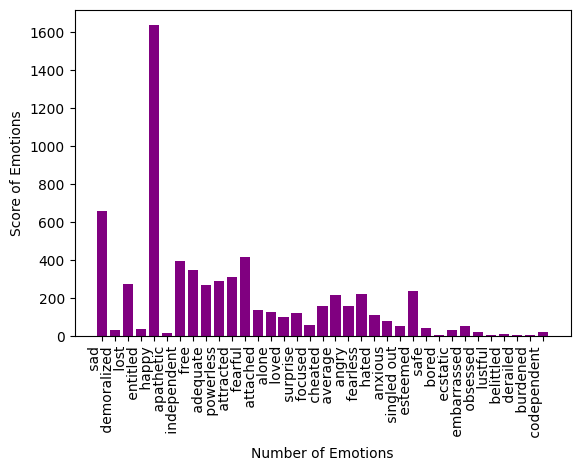

In [72]:
# plt.bar(emotion_counter.keys() , emotion_counter.values() ,color="purple")

fig ,axl = plt.subplots()
axl.bar(emotion_list_modi_counter.keys() , emotion_list_modi_counter.values() ,color="purple")    
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.xlabel("Number of Emotions")
plt.ylabel("Score of Emotions")
plt.show()

In [ ]:
# plt.bar(emotion_counter.keys() , emotion_counter.values() ,color="purple")

fig ,axl = plt.subplots()
for i in range(len(modi_df['Tweet'])):
    axl.bar(modi_df['Emotion_count'][i].keys() , modi_df['Emotion_count'][i].values() ,color="purple", width=0.8)
    
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.xlabel("Number of Emotions")
plt.ylabel("Score of Emotions")
plt.show()